<a href="https://colab.research.google.com/github/kungumabalaji/balaji-/blob/main/Copy_of_GEN_AI_FINACE_SELF_PROJECT_(TIMEGAN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow pandas numpy scikit-learn matplotlib


In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import  tensorflow as tf
from tensorflow.keras import layers
from  sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Length of Date list: 30
Length of Close list: 30
        Date   Close
0 2023-01-01  150.25
1 2023-01-02  152.10
2 2023-01-03  151.30
3 2023-01-04  153.00
4 2023-01-05  155.50


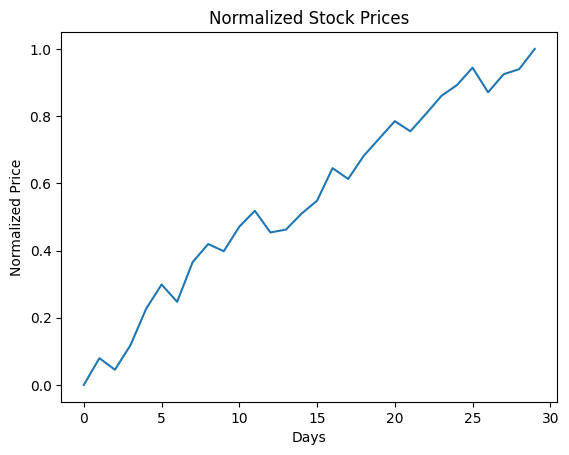

In [3]:


# Finance data for stock price  (30 closing prices)
data = {
    'Date': pd.date_range(start='2023-01-01', periods=30, freq='D'),  # 30 dates from Jan 1, 2023
    'Close': [150.25, 152.10, 151.30, 153.00, 155.50, 157.20, 156.00,
              158.75, 160.00, 159.50, 161.20, 162.30, 160.80, 161.00,
              162.10, 163.00, 165.25, 164.50, 166.10, 167.30, 168.50,
              167.80, 169.00, 170.25, 171.00, 172.20, 170.50, 171.75,
              172.10, 173.50]  # Now 30 closing prices, removed the extra one
}

# Check the lengths of Date and Close again
print(f"Length of Date list: {len(data['Date'])}")
print(f"Length of Close list: {len(data['Close'])}")

# Create DataFrame from data dictionary
df = pd.DataFrame(data)

# Show the first few rows of the data
print(df.head())

# We will use only the 'Close' column for training
time_series = df[['Close']].values

# Normalize the data (between 0 and 1)
scaler = MinMaxScaler()
time_series_scaled = scaler.fit_transform(time_series)

# Plot the normalized data
plt.plot(time_series_scaled)
plt.title("Normalized Stock Prices")
plt.xlabel("Days")
plt.ylabel("Normalized Price")
plt.show()


In [4]:
# if we want to predict the tommarow stock price we need to do sequence like understand the pattern before and give the futire outcome
# prepare the sequences for time series learning

# Function to create sequences of data (sliding window)
def create_sequences(data, seq_lef=30):  # def the function
    sequences=[]   # craeteting an emplt list to store the result
    for i in range(len(data)-seq_length): # it is loop for 5 times like like data is 35 total we need to do it for 30 because in financial market for a month its 30 days only  so its 5 times
        sequences .append(data[i:i+seq_length])  # The line sequences.append(data[i:i+seq_length]) creates overlapping windows of time series data, each containing seq_length consecutive data points, to train the model on past patterns for future predictions.
    return np .array (sequences)





In [5]:
# Define the generator (generates fake sequences)  # gan has 2 models generator, discriminator
def build_generator(input_shape): # defines the function to build gen model
    model = tf.keras.Sequential([  #  its create a sequential model which allows us to add a layers
        layers.Input(shape=input_shape), #  Input layer accepts sequences of shape (30, 1), which is the same as what the generator outputs.
        layers.LSTM(128, return_sequences=True),
        layers.Dense(input_shape[1])
    ])
    return model

# Define the discriminator (discriminates real vs fake sequences)
def build_discriminator(input_shape):
    model = tf.keras.Sequential([
        layers.Input(shape=input_shape),
        layers.LSTM(128, return_sequences=True),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Instantiate generator and discriminator
generator = build_generator((30, 1))
discriminator = build_discriminator((30, 1))



In [7]:
def create_sequences(data, seq_length=30):  # def the function
    sequences=[]   # craeteting an emplt list to store the result
    for i in range(len(data)-seq_length):
        sequences .append(data[i:i+seq_length])
    return np .array (sequences)

In [11]:
sequences = create_sequences(time_series_scaled, seq_length=30)  # Change 'seq_lef' to 'seq_length'

In [10]:

optimizer = tf.keras.optimizers.Adam(0.001)  # Set the optimizer

SyntaxError: invalid syntax (<ipython-input-8-bcc604efc3e4>, line 1)

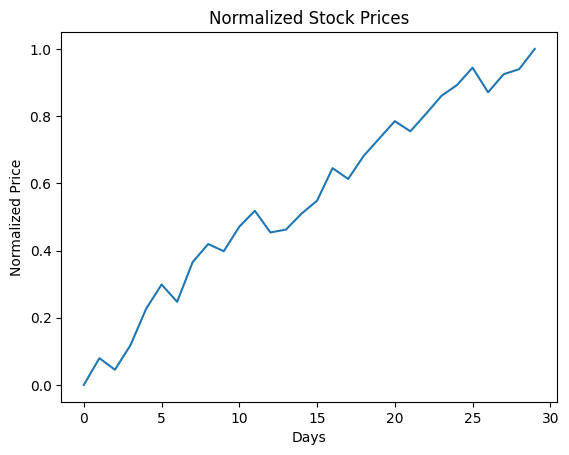

Shape of sequences: (20, 10, 1)
Epoch 1/100 | Discriminator Loss: 1.3642 | Generator Loss: 0.6966
Epoch 2/100 | Discriminator Loss: 1.3392 | Generator Loss: 0.7003
Epoch 3/100 | Discriminator Loss: 1.3159 | Generator Loss: 0.7034
Epoch 4/100 | Discriminator Loss: 1.2963 | Generator Loss: 0.7057
Epoch 5/100 | Discriminator Loss: 1.2728 | Generator Loss: 0.7078
Epoch 6/100 | Discriminator Loss: 1.2642 | Generator Loss: 0.7082
Epoch 7/100 | Discriminator Loss: 1.2406 | Generator Loss: 0.7078
Epoch 8/100 | Discriminator Loss: 1.2019 | Generator Loss: 0.7036
Epoch 9/100 | Discriminator Loss: 1.1931 | Generator Loss: 0.6963
Epoch 10/100 | Discriminator Loss: 1.2245 | Generator Loss: 0.6907
Epoch 11/100 | Discriminator Loss: 1.1816 | Generator Loss: 0.6760
Epoch 12/100 | Discriminator Loss: 1.1734 | Generator Loss: 0.6641
Epoch 13/100 | Discriminator Loss: 1.1607 | Generator Loss: 0.6366
Epoch 14/100 | Discriminator Loss: 1.1360 | Generator Loss: 0.6161
Epoch 15/100 | Discriminator Loss: 1.23

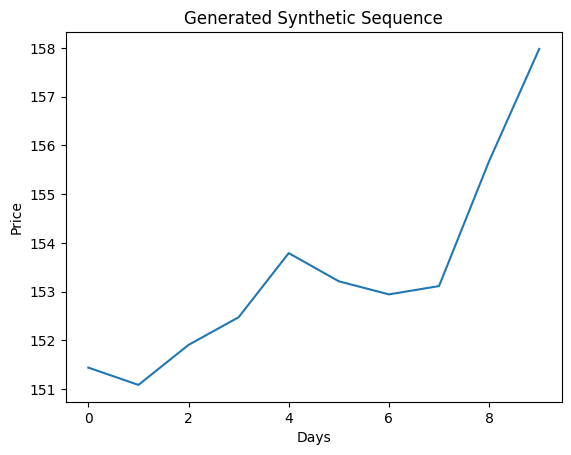

In [9]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare Synthetic Stock Price Data
data = {
    'Date': pd.date_range(start='2023-01-01', periods=30, freq='D'),
    'Close': [
        150.25, 152.10, 151.30, 153.00, 155.50, 157.20, 156.00, 158.75, 160.00, 159.50,
        161.20, 162.30, 160.80, 161.00, 162.10, 163.00, 165.25, 164.50, 166.10, 167.30,
        168.50, 167.80, 169.00, 170.25, 171.00, 172.20, 170.50, 171.75, 172.10, 173.50
    ]
}
df = pd.DataFrame(data)

# Normalize the data
scaler = MinMaxScaler()
time_series = df[['Close']].values
time_series_scaled = scaler.fit_transform(time_series)

# Plot normalized data
plt.plot(time_series_scaled)
plt.title("Normalized Stock Prices")
plt.xlabel("Days")
plt.ylabel("Normalized Price")
plt.show()

# Step 2: Create Sequences
def create_sequences(data, seq_length=10):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

seq_length = 10
sequences = create_sequences(time_series_scaled, seq_length)
print(f"Shape of sequences: {sequences.shape}")  # Expected: (20, 10, 1)

# Step 3: Define Generator
def build_generator(input_shape):
    model = tf.keras.Sequential([
        layers.Input(shape=input_shape),
        layers.LSTM(128, return_sequences=True),  # Captures time patterns
        layers.Dense(input_shape[1])  # Output the same shape as input
    ])
    return model

# Step 4: Define Discriminator
def build_discriminator(input_shape):
    model = tf.keras.Sequential([
        layers.Input(shape=input_shape),
        layers.LSTM(128, return_sequences=False),  # Single output for classification
        layers.Dense(1, activation='sigmoid')  # Binary output: Real (1) or Fake (0)
    ])
    return model

# Initialize models
generator = build_generator((seq_length, 1))
discriminator = build_discriminator((seq_length, 1))

# Define optimizers and loss function
generator_optimizer = tf.keras.optimizers.Adam(0.001)
discriminator_optimizer = tf.keras.optimizers.Adam(0.001)
bce_loss = tf.keras.losses.BinaryCrossentropy()

# Step 5: Training Loop
epochs = 100
batch_size = 16

for epoch in range(epochs):
    total_disc_loss = 0
    total_gen_loss = 0

    # Ensure batch size doesn't exceed data size
    num_batches = max(1, len(sequences) // batch_size)

    for _ in range(num_batches):
        # Sample real sequences
        idx = np.random.randint(0, sequences.shape[0], min(batch_size, len(sequences)))
        real_sequences = sequences[idx]

        # Generate fake sequences
        noise = tf.random.normal(shape=(len(real_sequences), seq_length, 1))
        synthetic_sequences = generator(noise)

        # Train Discriminator
        with tf.GradientTape() as disc_tape:
            real_preds = discriminator(real_sequences)
            fake_preds = discriminator(synthetic_sequences)

            disc_loss_real = bce_loss(tf.ones_like(real_preds), real_preds)
            disc_loss_fake = bce_loss(tf.zeros_like(fake_preds), fake_preds)
            disc_loss = disc_loss_real + disc_loss_fake

        disc_grads = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
        discriminator_optimizer.apply_gradients(zip(disc_grads, discriminator.trainable_variables))

        # Train Generator
        with tf.GradientTape() as gen_tape:
            synthetic_sequences = generator(noise)
            fake_preds = discriminator(synthetic_sequences)
            gen_loss = bce_loss(tf.ones_like(fake_preds), fake_preds)

        gen_grads = gen_tape.gradient(gen_loss, generator.trainable_variables)
        generator_optimizer.apply_gradients(zip(gen_grads, generator.trainable_variables))

        # Accumulate losses
        total_disc_loss += disc_loss.numpy()
        total_gen_loss += gen_loss.numpy()

    # Calculate average losses
    avg_disc_loss = total_disc_loss / num_batches
    avg_gen_loss = total_gen_loss / num_batches

    # Print losses for each epoch
    print(f"Epoch {epoch + 1}/{epochs} | Discriminator Loss: {avg_disc_loss:.4f} | Generator Loss: {avg_gen_loss:.4f}")

# Step 6: Generate Synthetic Data
noise = tf.random.normal(shape=(1, seq_length, 1))
generated_sequence = generator(noise).numpy()

# Rescale generated sequence back to original scale
generated_sequence_rescaled = scaler.inverse_transform(generated_sequence[0])
plt.plot(generated_sequence_rescaled)
plt.title("Generated Synthetic Sequence")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()



In [ ]:
import tensorflow as tf

# ... (rest of your code)

@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        # Get the discriminator's predictions
        predictions = discriminator(images, training=True)

        # Reshape predictions to match labels shape (32,)
        predictions = tf.reshape(predictions, (tf.shape(labels)[0],))

        loss = tf.keras.losses.binary_crossentropy(labels, predictions)
    gradients = tape.gradient(loss, discriminator.trainable_variables)
    discriminator.optimizer.apply_gradients(zip(gradients, discriminator.trainable_variables))
    return loss

# ... (rest of your code)

In [ ]:
def create_sequences(data, seq_length=30):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

# Assuming time_series_scaled is your preprocessed data
sequences = create_sequences(time_series_scaled, seq_length=seq_length)  # seq_length should be defined as well

In [ ]:
for epoch in range(epochs):
    total_disc_loss = 0
    total_gen_loss = 0

    # Ensure at least one batch
    num_batches = max(1, len(sequences) // batch_size)

    for _ in range(num_batches):
        # Sample real sequences
        idx = np.random.randint(0, sequences.shape[0], min(batch_size, len(sequences)))
        real_sequences = sequences[idx]

        # Generate synthetic sequences
        noise = tf.random.normal(shape=(len(real_sequences), seq_length, 1))  # Match real_sequences batch size
        synthetic_sequences = generator(noise)

        # Train Discriminator
        with tf.GradientTape() as disc_tape:
            real_preds = discriminator(real_sequences)
            fake_preds = discriminator(synthetic_sequences)

            disc_loss_real = bce_loss(tf.ones_like(real_preds), real_preds)
            disc_loss_fake = bce_loss(tf.zeros_like(fake_preds), fake_preds)
            disc_loss = disc_loss_real + disc_loss_fake

        disc_grads = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
        discriminator_optimizer.apply_gradients(zip(disc_grads, discriminator.trainable_variables))

        # Train Generator
        with tf.GradientTape() as gen_tape:
            synthetic_sequences = generator(noise)
            fake_preds = discriminator(synthetic_sequences)
            gen_loss = bce_loss(tf.ones_like(fake_preds), fake_preds)

        gen_grads = gen_tape.gradient(gen_loss, generator.trainable_variables)
        generator_optimizer.apply_gradients(zip(gen_grads, generator.trainable_variables))

        # Accumulate losses
        total_disc_loss += disc_loss.numpy()
        total_gen_loss += gen_loss.numpy()

    # Calculate average losses
    avg_disc_loss = total_disc_loss / num_batches
    avg_gen_loss = total_gen_loss / num_batches

    # Print losses
    print(f"Epoch {epoch + 1}/{epochs} | Discriminator Loss: {avg_disc_loss:.4f} | Generator Loss: {avg_gen_loss:.4f}")


In [ ]:
num_batches = max(1, len(sequences) // batch_size)


In [ ]:
idx = np.random.randint(0, sequences.shape[0], min(batch_size, len(sequences)))


In [ ]:
noise = tf.random.normal(shape=(len(real_sequences), seq_length, 1))


In [ ]:
real_labels = tf.ones((batch_size, 1)) * 0.9


In [ ]:
discriminator_optimizer = tf.keras.optimizers.Adam(0.0005)


In [ ]:
noise = tf.random.normal(shape=(1, seq_length, 1))
generated_sequence = generator(noise).numpy()
plt.plot(scaler.inverse_transform(generated_sequence[0]))
plt.title("Generated Sequence")
plt.show()


In [ ]:
layers.Dropout(0.2),
